## Data Gathering

For this project, there're three data sources that we need to fetch from. Firstly, we need to simply read and process the already-defined `twitter-archive-enhanced.csv` set from the project directory, which contains the bulk of the information of the dataset. Secondly, we'll utilize the `request` library to fetch `image-predictions.tsv` from Udaciy's remote server. Lastly, we'll take advantage of the Twitter API and run mass queries against all the tweets from `twitter-archive-enhanced.csv` to fetch their `retweet_count` and `favorite_count` columns.

In [27]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import io
import os
%matplotlib inline 

In [28]:
# load the data from WeRateDog's archive file 
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# examine twitter archive structure 
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# load the data from image predictions file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
c = r.content
image_predictions = pd.read_csv(io.StringIO(c.decode('utf-8')), sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# load Twitter auth credentials from .env
%load_ext dotenv
%dotenv

In [7]:
# load retweet & favorite data with Twitter API & Tweepy 
# authenticate with tokens and secrets
auth = tweepy.OAuthHandler(os.getenv("consumer_key"), os.getenv("consumer_secret"))
auth.set_access_token(os.getenv("access_token"), os.getenv("access_token_secret"))
# set wait_on_rate_limit and wait_on_rate_limit_notify to true to allow API to wait for rate limit to replenish
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# create the destination file
with open("tweet_json.txt", "w") as dest:
    # loop through each tweet in archive
    for tweet_id in archive['tweet_id']:
        # query with API and convert payload to JSON, then write to the dest file
        try:
            tweet = api.get_status(tweet_id)
            tweet_json = tweet._json
            json.dump(tweet_json, dest)
            dest.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 475
Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 734


In [5]:
# initialize an empty list which will be populated with tweet data later
json_list = []
with open("tweet_json.txt", encoding='UTF-8') as f:
    # loop through each line in the file 
    for line in f:
        # load the data to a Python dict
        data_json = json.loads(line.strip())
        # retreat the values then store it in a new dictionary which will be parsed to the list
        id = data_json['id']
        retweet_count = data_json['retweet_count']
        favorite_count = data_json['favorite_count']
        json_list.append({
            'tweet_id': id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })

In [6]:
# convert the list to a Pandas dataframe 
api_data = pd.DataFrame(json_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Data Assessing

For the assessment step, we'll examine the data by both visual and programmatic inspection. For each of the three data sources we have, we'll first fetch some sample rows and take a look to see if there's any peculiarities. If so, we'll dive deeper with Pandas queries and commands.

In [12]:
print(archive.shape[0])
print(image_predictions.shape[0])
print(api_data.shape[0])

2356
2075
2333


In [40]:
# examine the twitter archive
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# To get started, let's see if we have any dups in tweets. 
duplicateTweet = archive[archive.duplicated(['tweet_id'])]
print(duplicateTweet)

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [15]:
# Theoretically, the denominator should be 10 for all rows. Let' see if that's actually the case
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# Is the timestamp column's data type literally timestamp?
type(archive.loc[2, 'timestamp'])

str

In [17]:
# Looks like there is a lot of rows with null names. Let's examine that
archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Toby            7
Buddy           7
Bailey          7
Daisy           7
Stanley         6
Koda            6
Oscar           6
Dave            6
Rusty           6
Jack            6
Scout           6
Milo            6
Leo             6
Jax             6
Bella           6
Finn            5
             ... 
Kota            1
Cuddles         1
Pumpkin         1
Dante           1
Diogi           1
Lilah           1
Crawford        1
incredibly      1
Mookie          1
Gerbald         1
Franq           1
Bronte          1
Banditt         1
Scott           1
Eriq            1
Grizzwald       1
Divine          1
Lucia           1
Torque          1
Nida            1
Lenox           1
Marq            1
Bobbay          1
Birf            1
Leonidas  

In [18]:
# Per project instruction, we only want to include the original tweets. So maybe remove those rows from dataframe because we don't want retweets 
architeRetweeted = archive[archive['retweeted_status_timestamp'].notnull()]
numarchiteRetweeted = architeRetweeted.shape[0]
print(numarchiteRetweeted)

181


In [19]:
# examine the image prediction data source
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
725,686050296934563840,https://pbs.twimg.com/media/CYVXBb9WsAAwL3p.jpg,1,Pomeranian,0.985789,True,keeshond,0.004083,True,Pekinese,0.003334,True
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
1821,834574053763584002,https://pbs.twimg.com/media/C5UAqgyXAAAbMWH.jpg,1,toilet_tissue,0.262936,False,golden_retriever,0.226564,True,bathtub,0.078879,False
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
24,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
447,674670581682434048,https://pbs.twimg.com/media/CVzpUGUWUAAo7Vn.jpg,1,malamute,0.180079,True,Eskimo_dog,0.178033,True,Siberian_husky,0.077966,True
1985,872261713294495745,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074820,True
1884,847606175596138505,https://pbs.twimg.com/media/C8NNUDBUMAE0XxJ.jpg,1,Cardigan,0.413688,True,Boston_bull,0.381836,True,doormat,0.065868,False
110,667886921285246976,https://pbs.twimg.com/media/CUTPnPCW4AI7R0y.jpg,1,Pomeranian,0.800432,True,Pekinese,0.168445,True,Chihuahua,0.008950,True


In [20]:
# Examine the img_num column
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [21]:
# See if any of the predictions is more than 100%
image_predictions.query('p1_conf >=1 | p2_conf >=1 | p3_conf >=1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [22]:
# examine the data we fetched from the Twitter API
api_data.sample(10)

,tweet_id,retweet_count,favorite_count
1045,740676976021798912,6984,18571
1218,712085617388212225,495,3322
1889,674394782723014656,574,1505
541,803321560782307329,5604,0
322,832636094638288896,2878,16291
1107,729463711119904772,2366,5909
1712,679729593985699840,847,2199
2291,666701168228331520,212,421
619,793286476301799424,9682,25747
1413,697259378236399616,1026,3362


In [23]:
# We have some zero favorites for tweets with a high retweet_count. Let's look into this
api_data['favorite_count'].value_counts()

0        165
1093       3
2598       3
1339       3
1825       3
2909       3
1288       3
2697       3
1648       3
1244       3
3212       3
2875       3
2525       3
1102       3
1322       3
2250       2
2897       2
2371       2
1101       2
3664       2
99         2
3503       2
3210       2
496        2
1184       2
2712       2
1110       2
4207       2
663        2
2273       2
        ... 
10508      1
583        1
533        1
6726       1
29207      1
14872      1
2586       1
541        1
12833      1
10790      1
10792      1
4649       1
2602       1
12843      1
10796      1
14898      1
4659       1
6708       1
90230      1
23096      1
2618       1
4667       1
19004      1
736        1
3233       1
53823      1
25153      1
88642      1
19765      1
16351      1
Name: favorite_count, Length: 1973, dtype: int64

### Quality

- retweet rows should be removed
- Erroneous data types (the data type of `timestamp` should be `datetime`, not `str`
- Redundant `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, or `retweeted_status_timestamp` columns
- The source column contains the entire HTML snippet but not the actual URL
- In the image prediction file, the 1st letter of some of the breed is upper-case while some is lower-cased 
- `tweet_id` #667866724293877760 tweet has probabilities greater than 100%
- Multiple values of rating denumerator
- There is a row whose rating denominator is 0 

### Tidiness

- Irrelevant values (ratings and URL) from the text column 
- There are four columns (`doggo`, `floofer`, `puffer`, `puppo`) that belong to the same category and coule be merged to one column
- `retweet_count` and `favorite_count` should be in the `archive` table, so does the columns in `image_predictions.tsv`  

## Data Cleaning

In [62]:
# First of all, make a copy of the files just in case
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
api_data_clean = api_data.copy()

### Tidiness

#### Multiple irrelevant values (ratings and URL) from the `text` column

##### Define
Extract the extra values from the text and only leave the text itself to avoid multiple variables stored in same column

##### Code

In [63]:
# Use regex to extract the text part before the rating
archive_clean.text = archive_clean.text.str.extract('([^\d]*)')
# Remove the extra trailing space
archive_clean.text = archive_clean.text.str.strip()

##### Test 

In [64]:
# Grab a couple of the rows and examine
print(archive_clean.at[4, 'text'])
print(archive_clean.at[18, 'text'])
print(archive_clean.at[89, 'text'])

This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such.
This is Ralphus. He's powering up. Attempting maximum borkdrive.
Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir.


#### There are four columns (`doggo`, `floofer`, `puffer`, `puppo`) that belong to the same category and coule be merged to one column

##### Define
Merge the four columns into one column called `stage` of `str` type

In [65]:
# init a str array of default stage names
stages = ['doggo','floofer','pupper','puppo']
# loop through each row in the data frame
for index, row in archive_clean.iterrows():
    # init an empty array to hold the result
    stages_result = []
    for stage in stages:
        # if there's a match, add the stage to the result array
        if (row[stage] == stage):
            stages_result.append(stage)
    # if nothing is found, just return "None"
    if (len(stages_result) == 0):
        stages_result = "None"
    # if there's more than one stage, return "Multiple_stages"
    elif (len(stages_result) > 1):
        stages_result = "Multiple_stages"
    # else, just return the first and only element of the array
    else:
        stages_result = stages_result[0]
    # update the data frame with the new stage column
    archive_clean.at[index, "stage"] = stages_result

##### Code

In [66]:
# now that we don't need the individual stage columns, can just drop them
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
# format the stage name
archive_clean.stage = archive_clean.stage.str.capitalize()

In [70]:
multiple_stage_dogs = archive_clean.query('stage == "Multiple_stages"')
multiple_stage_dogs.count()

tweet_id                      14
in_reply_to_status_id          1
in_reply_to_user_id            1
timestamp                     14
source                        14
text                          14
retweeted_status_id            2
retweeted_status_user_id       2
retweeted_status_timestamp     2
expanded_urls                 14
rating_numerator              14
rating_denominator            14
name                          14
stage                         14
dtype: int64

Since there're 14 tweets with multiple stages, manual cleaning would be a time-consuming process that's probably not worth the effort. We'll just do one just to showcase how we could do that.

In [84]:
text = multiple_stage_dogs.iloc[0].text
tid = multiple_stage_dogs.iloc[0].tweet_id
print(text)

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda.


Aha! We could clearly see that this dog is a `puppo` disguising `doggo`

In [85]:
idx = archive_clean[archive_clean.tweet_id == tid].index
archive_clean.at[idx, "stage"] = "Puppo"

##### Test 

In [86]:
# now the count should be 13 since we renamed the stage for that record
archive_clean.query('stage == "Multiple_stages"').count()

tweet_id                      13
in_reply_to_status_id          1
in_reply_to_user_id            1
timestamp                     13
source                        13
text                          13
retweeted_status_id            2
retweeted_status_user_id       2
retweeted_status_timestamp     2
expanded_urls                 13
rating_numerator              13
rating_denominator            13
name                          13
stage                         13
dtype: int64

In [87]:
archive_clean.stage.value_counts()

None               1976
Pupper              245
Doggo                83
Puppo                30
Multiple_stages      13
Floofer               9
Name: stage, dtype: int64

#### `retweet_count` and `favorite_count` should be in the `archive` table, so does the columns in `image_predictions.tsv`

##### Define
Merge the three data sources on `tweet_id` (to avoid a single observational unit `tweet` is in all three tables)

##### Code

In [88]:
archive_clean = pd.merge(archive_clean, api_data_clean, on=['tweet_id'], how='left')
archive_clean = pd.merge(archive_clean, image_predictions_clean, on=['tweet_id'], how='left')

##### Test 

In [89]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Quality

#### Retweet rows should be removed. Rows without 'retweet_count' or 'favorite_count' should be removed.

##### Define
Remove the rows with `retweeted_status_id`, then remove the rows without `retweet_count`

##### Code

In [90]:
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull()].index,inplace=True)
archive_clean.drop(archive_clean[archive_clean['retweet_count'].isnull()].index,inplace=True)

##### Test 

In [91]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2168 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2168 non-null object
source                        2168 non-null object
text                          2168 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2110 non-null object
rating_numerator              2168 non-null int64
rating_denominator            2168 non-null int64
name                          2168 non-null object
stage                         2168 non-null object
retweet_count                 2168 non-null float64
favorite_count                2168 non-null float64
jpg_url                       1987 non-null object
img_num                       1987 n

#### Erroneous data types (the data type of `timestamp` should be `datetime`, not `str`. Type of  `retweet_count` and `favorite_count` was changed to float after the merge)

##### Define
Change the type of `timestamp` column to datetime data type. Change `retweet_count` and `favorite_count` to integer.

##### Code

In [92]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

##### Test 

In [93]:
archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
stage                                 object
retweet_count                          int64
favorite_count                         int64
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2                                    object
p2_conf   

#### Redundant columns such as  `in_reply_to_status_id`, `in_reply_to_user_id` and `retweeted_status_id`

##### Define
Remove `in_reply_to_status_id`, `in_reply_to_status_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns from `archive_clean`

##### Code

In [94]:
archive_clean = archive_clean.drop(['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test 

In [95]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [96]:
archive_clean.stage.value_counts()

None               1825
Pupper              224
Doggo                74
Puppo                25
Multiple_stages      11
Floofer               9
Name: stage, dtype: int64

#### The `source` column contains the entire HTML snippet but not the actual URL

##### Define
Extract the URL from the `source` column

##### Code

In [97]:
# use regex to extract the URL from source text
archive_clean.source = archive_clean.source.str.extract('((http|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?)')

##### Test 

In [98]:
archive_clean.source.value_counts()

http://twitter.com/download/iphone              2036
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

#### In the image prediction file, the 1st letter of some of the breed is upper-case while some is lower-cased 

##### Define
Capitalize all the values in `p1`, `p2` and `p3`

##### Code

In [99]:
archive_clean.p1 = archive_clean.p1.str.capitalize()
archive_clean.p2 = archive_clean.p2.str.capitalize()
archive_clean.p3 = archive_clean.p3.str.capitalize()

##### Test 

In [100]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1447,696488710901260288,2016-02-08 00:20:23,http://twitter.com/download/iphone,,https://twitter.com/dog_rates/status/696488710...,12,10,None,None,1041,...,1.0,Briard,0.369063,True,Scotch_terrier,0.168204,True,Giant_schnauzer,0.120553,True
2033,671744970634719232,2015-12-01 17:37:36,http://twitter.com/download/iphone,Very fit horned dog here. Looks powerful. Not ...,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,757,...,1.0,Ice_bear,0.251193,False,Ram,0.213839,False,Arctic_fox,0.081551,False
2030,671789708968640512,2015-12-01 20:35:22,http://twitter.com/download/iphone,This is space pup. He's very confused. Tries t...,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,3446,...,1.0,Dalmatian,0.114259,True,Teddy,0.062275,False,Steam_locomotive,0.049700,False
1808,676897532954456065,2015-12-15 22:52:02,http://twitter.com/download/iphone,Exotic handheld dog here. Appears unathletic. ...,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,726,...,1.0,Hamster,0.628255,False,Guinea_pig,0.318646,False,Macaque,0.013058,False
1446,696490539101908992,2016-02-08 00:27:39,http://twitter.com/download/iphone,After reading the comments I may have overesti...,NaN,1,10,None,None,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### `tweet_id` #667866724293877760 tweet has probabilities greater than 100%

##### Define
It's probably better to remove this row since the predictions are way off

##### Code

In [101]:
archive_clean.drop(archive_clean[archive_clean.tweet_id == 667866724293877760].index, inplace=True)

##### Test 

In [102]:
archive_clean.query('tweet_id == 667866724293877760')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Multiple values of rating denumerator

##### Define
Since there are multiple values of `rating_denumerator`, it's better to come up with a scale to compute the normalized rating. The most straightforward way would be divide the `rating_numerator` by `rating_denumerator`.

##### Code

In [103]:
# fetch a list of tweets with 0 favorite count
archive_clean['rating_score'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)
# round the result to 2 decimals
archive_clean['rating_score'] = archive_clean['rating_score'].apply(lambda x: round(x, 2))

##### Test 

#### There is a row whose rating denominator is 0 

##### Define
Remove the row whose `rating_denominator` is 0

##### Code

In [104]:
archive_clean.drop(archive_clean[archive_clean.rating_denominator == 0].index, inplace=True)

##### Test 

In [105]:
archive_clean.query('rating_denominator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_score


### Data Storing

In [106]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis & Visualization

### Research Question 1: According to the first prediction (`p1`), which breeds have the highest ratings?

##### First of all, we want to make sure the result is not a fluke or from one single data. Thus we want to have a threshold for the sample size. In our case, we'll set it to 15.

In [107]:
# get a Pandas series of each breed's occurrence count
breed_counts = archive_clean.p1.value_counts()
# filter out the >=5 breeds and convert them to a list of breed names
breed_idx_fiveup = breed_counts[breed_counts >= 15].index.tolist()
# apply the filter to the original data frame
archive_clean_fiveup = archive_clean[archive_clean.p1.isin(breed_idx_fiveup)]

In [108]:
# group the breed and get their mean ratings, then select the top 5 breed in terms of rating
top_five_breed = archive_clean_fiveup.groupby('p1').mean()['rating_score'].nlargest(5)

In [109]:
top_five_breed.round(2)

p1
Pomeranian    1.29
Web_site      1.21
Kuvasz        1.21
Eskimo_dog    1.18
Samoyed       1.17
Name: rating_score, dtype: float64

##### Now, what's the average rating among all?

In [110]:
archive_clean.rating_score.mean()

1.2234856879039704

Text(0,0.5,'Rating')

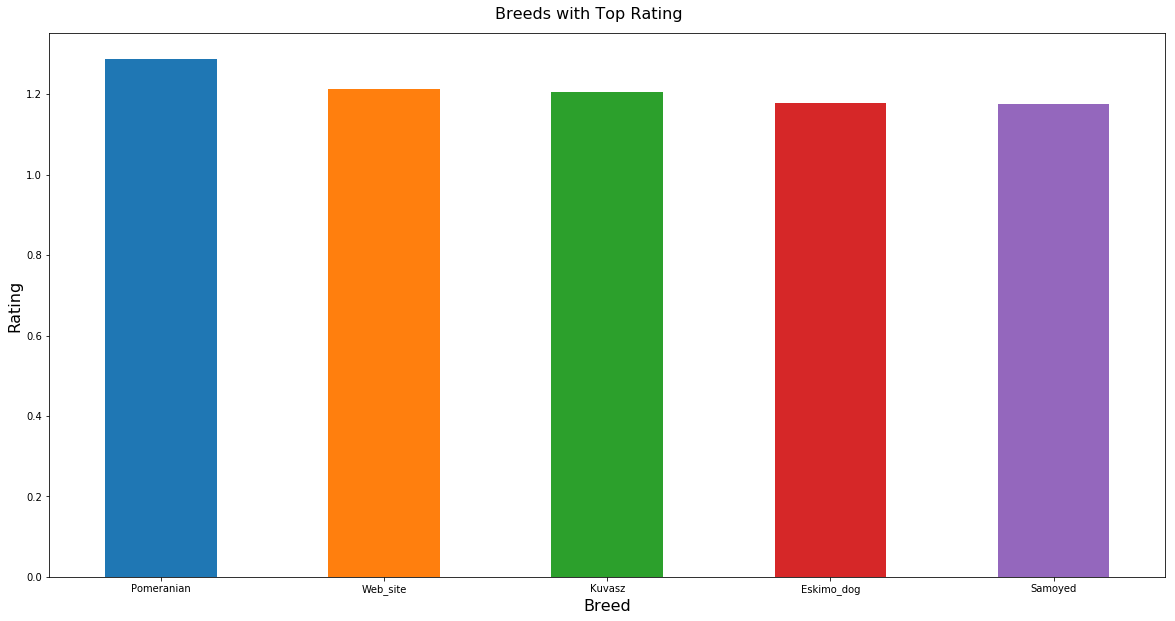

In [112]:
top_five_breed.plot(kind="bar", figsize=(20, 10), rot=0)
plt.figtext(.5,.9,'Breeds with Top Rating', fontsize=16, ha='center')
plt.xlabel('Breed', fontsize=16)
plt.ylabel('Rating', fontsize=16)

It looks like Pomeranian has the highest rating above all with an average rating of 1.33, with a large margin against the other four top contenders in the race, whereas the other four breeds in the top 5 category are quite close to each other, whose average ratings hover slight below 1.2. It isn't too far away from the dataset-wide average of 1.18, though. 

### Research Question 2: Which are the top breeds with most fans on the Twitter Community? How are they different from Research Question #1?

##### For the sake of simplicity, we'll simply define `favorite_count` as the indicator of number of fans. Again, we'll apply the same sample size threshold to this research question.

In [113]:
breed_most_fans = archive_clean_fiveup.groupby('p1').mean()['favorite_count'].nlargest(5).astype(int)

In [114]:
breed_most_fans

p1
French_bulldog      17904
Web_site            15701
Cardigan            14339
Eskimo_dog          13903
Lakeland_terrier    12894
Name: favorite_count, dtype: int64

Text(0,0.5,'Favorite Count')

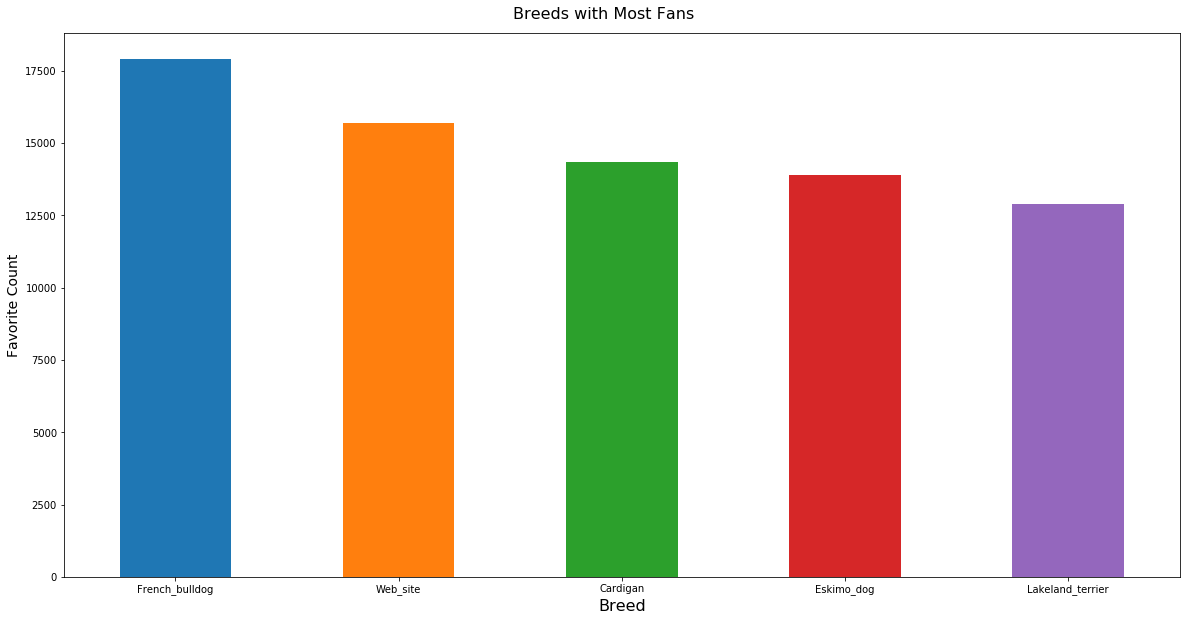

In [115]:
breed_most_fans.plot(kind="bar", figsize=(20,10), rot=0)
plt.figtext(.5,.9,'Breeds with Most Fans', fontsize=16, ha='center')
plt.xlabel('Breed', fontsize=16)
plt.ylabel('Favorite Count', fontsize=14)

Interestingly, different from @WeRateDogs, the fans on Twitter seemed to prefer a different set of breeds. As we could see from the data summary as well as the bar chart, the top two breeds (French Bulldog and Eskimo Dog) have in average the highest count of favorites on Twitter (around 19,000). They have a large lead against the other three on this list (Cardigan, Samoyed, and Golden Retriever). Among the latter 3 Cardigan has a noticeable margin agianst Samoyed and Golden Retriever, which are almost head-to-head differentiated by 100+ counts. 

Now, from the list of top 5 breed with the highest rating, only Eskimo (#3) and Golden Retriever (#4) remain on the fan's favorite list, ranked #2 and #5 respectively. Eskimo trumps Goldern Retriever on both rankings and given the fact that it's almost tied to French Bulldong on the second ranking, we're fairly confident that Eskimo enjoys popularity with both the critic (in this case @WeRateDogs) and the general public on the Twitter community. Pomeranian is the critic's favorite, while French Bulldog is the most popular breed with the community.

### Research Question 3:  In which stage do the dogs enjoy the most popularity? 

##### We'll define "popularity" here in `retweet_count` and `favorite_count`. Let's conduct an analysis similar to the ones above.

In [116]:
popularity_by_stage = archive_clean_fiveup.groupby('stage').mean()[['retweet_count', 'favorite_count']].astype(int)

In [117]:
popularity_by_stage

,retweet_count,favorite_count
stage,,
Doggo,8485,23520
Floofer,5614,15439
Multiple_stages,5210,16438
None,2504,8771
Pupper,2677,8378
Puppo,7019,25321


Text(0,0.5,'Count')

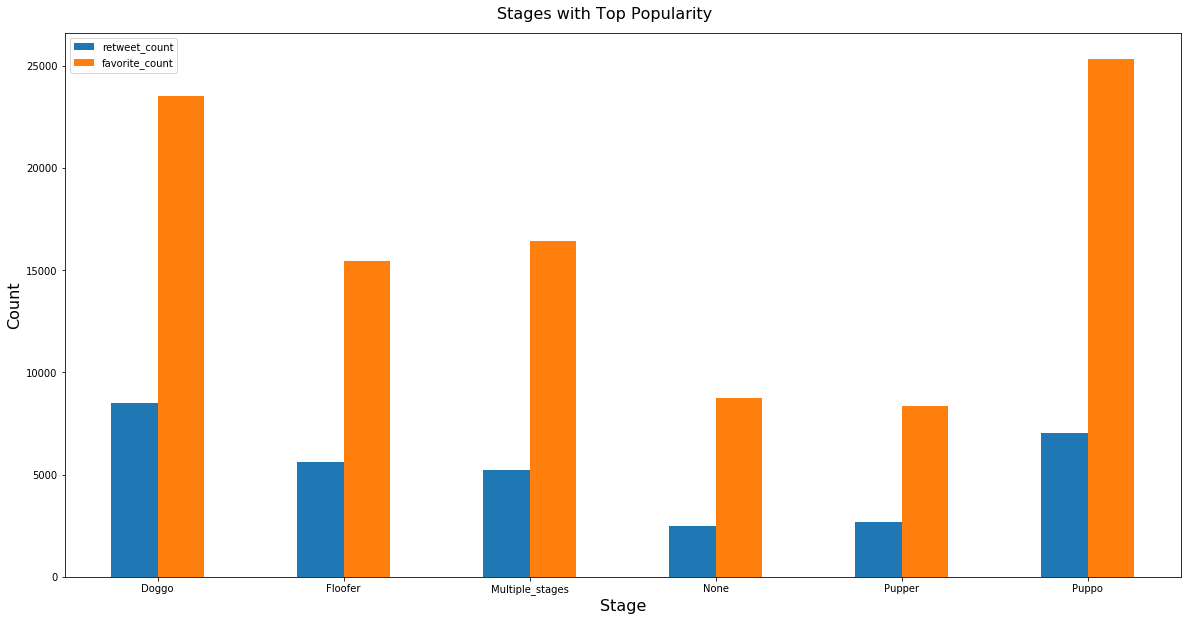

In [118]:
popularity_by_stage.plot(kind="bar", figsize=(20,10), rot=0)
plt.figtext(.5,.9,'Stages with Top Popularity', fontsize=16, ha='center')
plt.xlabel('Stage', fontsize=16)
plt.ylabel('Count', fontsize=16)

As we could see from the double bar chart, Doggo is the most popular stage leading in both `retweet_count` and `favorite_count`, followed by Floofer and Puppo with similar average statistics in both metrics. Comparatively, Puffer is not as popular as the other ones, especially in terms of `favorite_counts` which trail the other three by a significant margin.